<a href="https://colab.research.google.com/github/divyanshusharma1997/IBM_Telecom_Classification/blob/main/telecom_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [65]:
df= pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [66]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [67]:
df.shape

(7043, 21)

In [68]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [69]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print("_"*8)

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
________
gender
['Female' 'Male']
________
SeniorCitizen
[0 1]
________
Partner
['Yes' 'No']
________
Dependents
['No' 'Yes']
________
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
________
PhoneService
['No' 'Yes']
________
MultipleLines
['No phone service' 'No' 'Yes']
________
InternetService
['DSL' 'Fiber optic' 'No']
________
OnlineSecurity
['No' 'Yes' 'No internet service']
________
OnlineBackup
['Yes' 'No' 'No internet service']
________
DeviceProtection
['No' 'Yes' 'No internet service']
________
TechSupport
['No' 'Yes' 'No internet service']
________
StreamingTV
['No' 'Yes' 'No internet service']
________
StreamingMovies
['No' 'Yes' 'No internet service']
________
Contract
['Month-to-month' 'One year' 

### replacing empty column with NaN

In [70]:
for i in df.columns:
    df[i]= df[i].replace(" ", np.nan)

In [71]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [72]:
df.isnull().mean()*100

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [73]:
# 0.15% data is missing in TotalCharges column we can drop it instead of imputing this one
df= df.dropna()
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208
std,0.368844,24.545260,30.085974
min,0.000000,1.000000,18.250000
25%,0.000000,9.000000,35.587500
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.862500
max,1.000000,72.000000,118.750000


In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

In [75]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [77]:
trf1= ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown= 'ignore',sparse= False,drop= 'first'),['gender', 'Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies','Contract','PaperlessBilling','PaymentMethod']),
],remainder='passthrough', verbose_feature_names_out= False).set_output(transform='pandas')

In [78]:
df= trf1.fit_transform(df)

In [79]:
df.drop('customerID', axis=1, inplace= True)

In [80]:
df['Churn']= LabelEncoder().fit_transform(df['Churn'])

<Axes: >

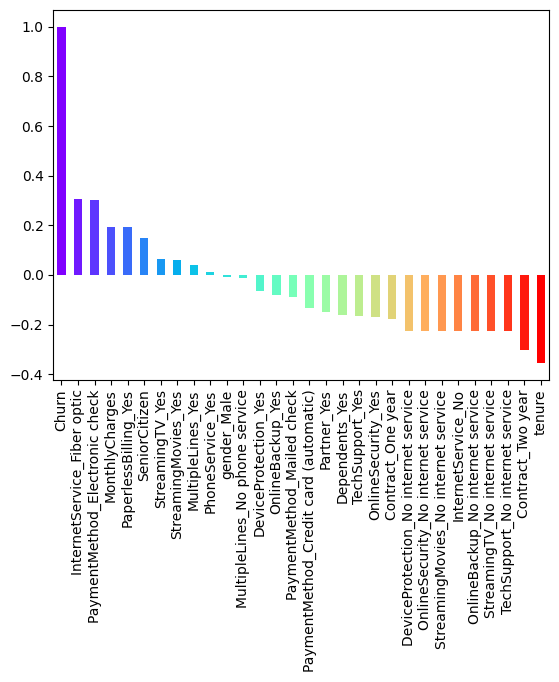

In [81]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(df.corr()['Churn'])))
df.corr()['Churn'].sort_values(ascending= False).plot(kind= 'bar',color=colors)

In [82]:
# finding duplicate columns if any
df_trans= df.T
duplicated_cols= df_trans[df_trans.duplicated()]
cols_to_drop= duplicated_cols.index

In [83]:
df.drop(cols_to_drop, axis=1, inplace= True)

<Axes: >

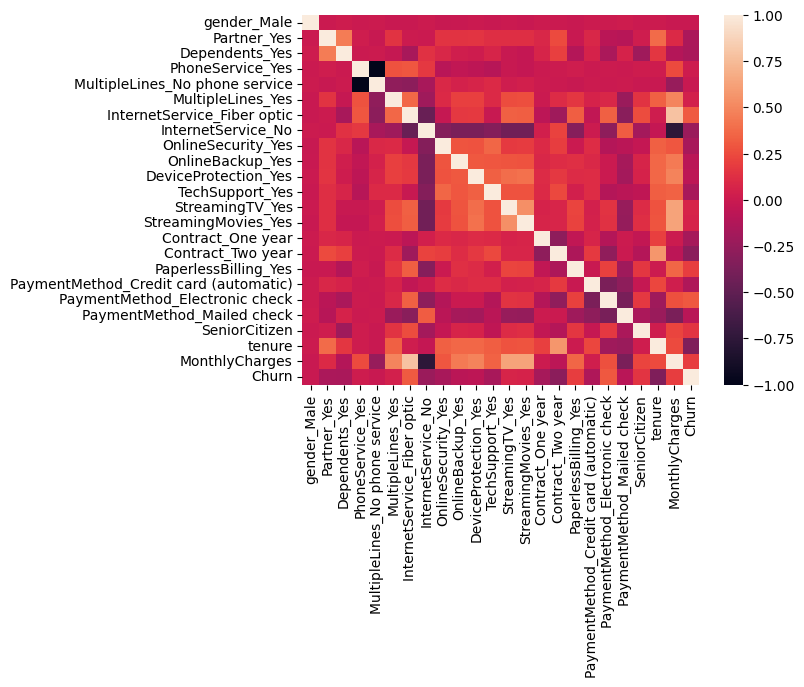

In [84]:
sns.heatmap(df.corr())

In [85]:
x= df.drop(['Churn'], axis= 1)
y= df['Churn']

In [86]:
x.shape

(7032, 24)

In [87]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [88]:
# dataset is imbalanced so we will use upsampling

In [89]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.2, random_state=42)

In [90]:
from imblearn.over_sampling import SMOTE
smote= SMOTE(sampling_strategy='minority')
xtrain, ytrain= smote.fit_resample(xtrain, ytrain)
ytrain.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

### testing the model

In [91]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [92]:
models= [
    ('knn', KNN()),
    ('log', LogisticRegression(max_iter=1500)),
    ('dtree', DecisionTreeClassifier()),
    ('Rforest', RandomForestClassifier())
]

model_params= [{
    'n_neighbors':range(1,16)
},
{
    'penalty':['l1','l2'],
    'solver': ['lbfgs','saga'],
    'C': np.logspace(-3,6,5)
},
{
    'criterion':["gini","entropy"],
    'max_depth':[3,4,5,6,None]
},
{
    'n_estimators': [30, 50, 100],
    'criterion':["gini","entropy"],
    'max_depth':[3,4,5,6,None],
    'min_samples_leaf':[3,5],
    'max_features':['auto', 'log2']
},
]

In [93]:
warnings.filterwarnings("ignore", category=FutureWarning, message="`max_features='auto'` has been deprecated.*")
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.ensemble._forest")

In [94]:
best_param= []
for mod, param in zip(models, model_params):
    model_name, model= mod
    grid= GridSearchCV(model, param_grid=param,n_jobs=-1, cv=5)
    grid.fit(xtrain, ytrain)
    print(model_name," best score :",grid.best_score_)
    best_param.append(grid.best_params_)

knn  best score : 0.7941888619854721
log  best score : 0.7728813559322034
dtree  best score : 0.8104116222760289
Rforest  best score : 0.8512106537530266


In [95]:
#SVM is taking more than 2 hours to run because of high dimentionality we will use PCA for dimentionality reduction

In [96]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)

In [97]:
pca.fit(xtrain,ytrain)

PCA()

In [98]:
eigenvalues_ratio=pca.explained_variance_ratio_

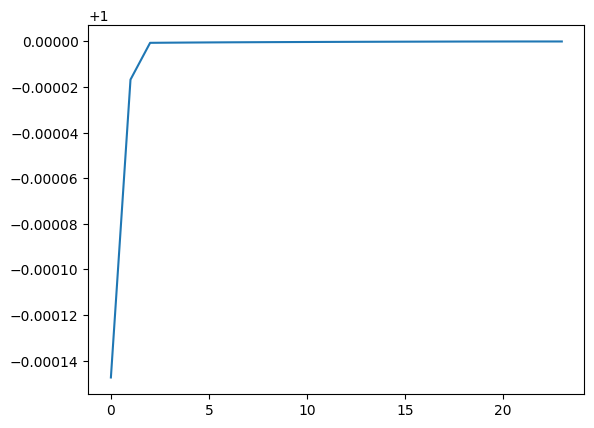

In [99]:
plt.plot(np.cumsum(eigenvalues_ratio))

In [100]:
np.cumsum(eigenvalues_ratio)

array([0.99985261, 0.99998328, 0.99999941, 0.99999948, 0.99999953,
       0.99999959, 0.99999963, 0.99999967, 0.99999971, 0.99999974,
       0.99999978, 0.99999981, 0.99999983, 0.99999986, 0.99999989,
       0.99999991, 0.99999993, 0.99999995, 0.99999997, 0.99999998,
       0.99999999, 1.        , 1.        , 1.        ])

In [101]:
pca1=PCA(n_components=3)
xtrain_trf=pca1.fit_transform(xtrain)
xtest_trf = pca1.transform(xtest)
xtrain_trf

array([[ 3.66454349e+01,  2.34313117e+01,  6.69670929e+00],
       [-1.85105845e+03, -2.40554187e+00, -6.75605412e+00],
       [ 2.41875301e+03,  9.91150999e+00,  8.78801814e-01],
       ...,
       [ 4.17404611e+03, -3.57968120e+00, -5.04930276e+00],
       [-1.96933808e+03, -1.92565130e+01, -8.84907109e-01],
       [-1.61983765e+03, -2.80375308e+01,  3.44161330e+00]])

In [102]:
pcadf = pd.DataFrame(data=xtrain_trf, columns=['PC1', 'PC2', 'PC3'])


In [103]:
pcadf

,PC1,PC2,PC3
0,36.645435,23.431312,6.696709
1,-1851.058451,-2.405542,-6.756054
2,2418.753011,9.911510,0.878802
3,514.172014,20.746326,5.107689
4,3409.308085,-7.954582,-1.964776
...,...,...,...
8255,-1825.597149,-20.806935,0.444768
8256,3477.432816,-11.976768,-1.034725
8257,4174.046110,-3.579681,-5.049303
8258,-1969.338084,-19.256513,-0.884907


In [104]:
fig = px.scatter_3d(pcadf, x='PC1', y='PC2', z='PC3', color=ytrain, color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [105]:
# we can see data is not linearly seperable to we will try kernel rbf and poly using gridsearch cv

In [107]:
para=[{
    'C' :[.1,1,100],
    'kernel' :['rbf','poly' ],
    'degree' :[2,3, 5]
} ]
grid_1= GridSearchCV(SVC(), param_grid=para, scoring ='accuracy', n_jobs =-1)
grid_1.fit(xtrain_trf, ytrain)
grid_1.best_score_

0.7352300242130749

In [108]:
# so will select 3 models random forest, logistic regression and knn

In [109]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

In [110]:
best_param

[{'n_neighbors': 1},
 {'C': 31.622776601683793, 'penalty': 'l2', 'solver': 'lbfgs'},
 {'criterion': 'gini', 'max_depth': 6},
 {'criterion': 'entropy',
  'max_depth': None,
  'max_features': 'log2',
  'min_samples_leaf': 3,
  'n_estimators': 100}]

In [142]:
log_clf= LogisticRegression(C=5623.413251903491, max_iter=1500)
log_clf.fit(xtrain, ytrain)
rf_clf= RandomForestClassifier(criterion= 'entropy',
max_features= 'log2',
  min_samples_leaf= 3,
  n_estimators= 50)
rf_clf.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       min_samples_leaf=3, n_estimators=50)

In [112]:
print("logistic regression:\n ",classification_report(ytest, log_clf.predict(xtest)))

logistic regression:
                precision    recall  f1-score   support

           0       0.90      0.73      0.81      1033
           1       0.51      0.77      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.80      0.74      0.75      1407



In [113]:
dtree_clf= DecisionTreeClassifier(criterion='gini', max_depth=6)
dtree_clf.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=6)

In [114]:
print('dtree classifier:\n', classification_report(ytest, dtree_clf.predict(xtest)))

dtree classifier:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      1033
           1       0.53      0.60      0.56       374

    accuracy                           0.75      1407
   macro avg       0.69      0.70      0.70      1407
weighted avg       0.76      0.75      0.76      1407



In [115]:
print("Random forest:\n ",classification_report(ytest, rf_clf.predict(xtest)))

Random forest:
                precision    recall  f1-score   support

           0       0.84      0.87      0.86      1033
           1       0.61      0.56      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



In [116]:
knn = KNN(n_neighbors=1)
knn.fit(xtrain, ytrain)
print('KNN: \n',classification_report(ytest, knn.predict(xtest)))

KNN: 
               precision    recall  f1-score   support

           0       0.82      0.76      0.79      1033
           1       0.45      0.53      0.49       374

    accuracy                           0.70      1407
   macro avg       0.63      0.65      0.64      1407
weighted avg       0.72      0.70      0.71      1407



### here false negetive are those value where we predicted that customer will stay but they churned this value should be low so sensitivity should be high or we can say recall should be high with good accuracy for class 1 to minimize the cost function

In [117]:
# confusion matrix for these 3 algos knn, log and rforest

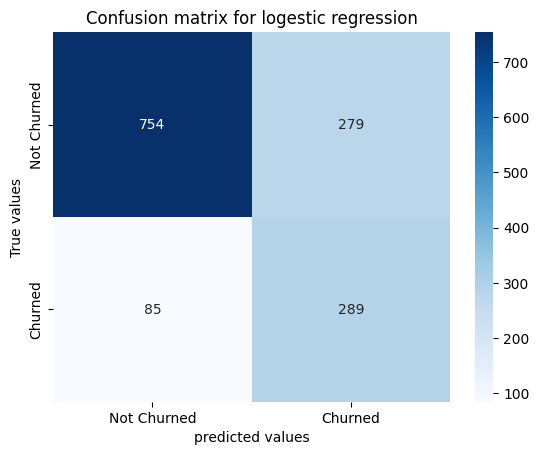

In [118]:
log_confusion_matrix= confusion_matrix(ytest, log_clf.predict(xtest))
#plotting a confusion matrix
labels = ['Not Churned', "Churned"]
ax= plt.subplot()
sns.heatmap(log_confusion_matrix,cmap="Blues",annot=True,fmt='.0f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('predicted values')
ax.set_ylabel('True values')
ax.set_title('Confusion matrix for logestic regression')
plt.show()

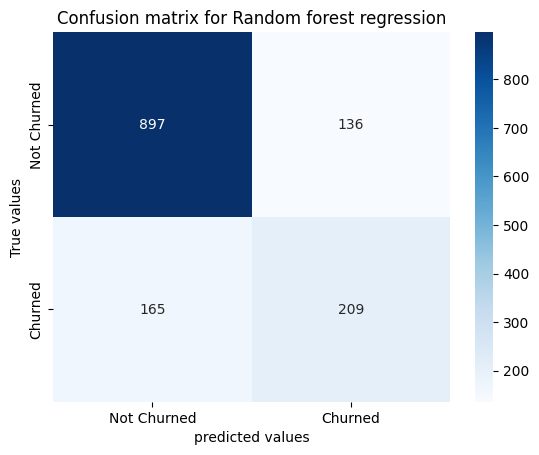

In [119]:
rf_confusion_mat= confusion_matrix(ytest, rf_clf.predict(xtest))
ax= plt.subplot()
sns.heatmap(rf_confusion_mat, cmap='Blues', fmt='.0f', annot=True, ax=ax)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('predicted values')
ax.set_ylabel('True values')
ax.set_title('Confusion matrix for Random forest regression')
plt.show()

In [120]:
#ROC curve for models tried

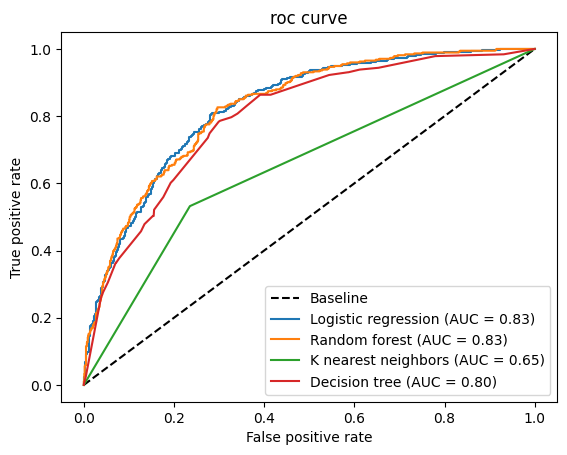

In [121]:
from sklearn.metrics._plot.roc_curve import roc_curve
lr_fpr, lr_tpr, lr_threshold= roc_curve(ytest, log_clf.predict_proba(xtest)[:,1])
rf_fpr, rf_tpr, rf_threshold= roc_curve(ytest, rf_clf.predict_proba(xtest)[:,1])
knn_fpr, knn_tpr, knn_threshold= roc_curve(ytest, knn.predict_proba(xtest)[:,1])
dtree_fpr, dtree_tpr, dtree_threshold= roc_curve(ytest, dtree_clf.predict_proba(xtest)[:,1])
plt.subplot(1,1,1)

# Plotting our Baseline..
plt.plot([0,1],[0,1], 'k--')

# Calculate AUC scores
lr_auc = roc_auc_score(ytest, log_clf.predict_proba(xtest)[:, 1])
rf_auc = roc_auc_score(ytest, rf_clf.predict_proba(xtest)[:, 1])
knn_auc = roc_auc_score(ytest, knn.predict_proba(xtest)[:, 1])
dtree_auc = roc_auc_score(ytest, dtree_clf.predict_proba(xtest)[:, 1])
plt.plot(lr_fpr, lr_tpr, label= 'Logistic regression')
plt.plot(rf_fpr, rf_tpr, label= 'Random forest')
plt.plot(knn_fpr, knn_tpr, label= 'K nearest neighbors')
plt.plot(dtree_fpr, dtree_tpr, label= 'Decision tree')

plt.legend(['Baseline', f'Logistic regression (AUC = {lr_auc:.2f})',
            f'Random forest (AUC = {rf_auc:.2f})',
            f'K nearest neighbors (AUC = {knn_auc:.2f})',
            f'Decision tree (AUC = {dtree_auc:.2f})'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('roc curve')
plt.show()

In [123]:
# optimal threshold

In [124]:
# in this scenario false postives are more crucial i.e. customers which our model predicted as not churned are actually churned.
# this should be mininum so we will choose logistic regression as our final model

In [125]:
optimal_idx= np.argmax(lr_tpr- lr_fpr)
opt_threshold= lr_threshold[optimal_idx]
opt_threshold

0.48498343119328535

In [148]:
from sklearn.preprocessing import binarize

y_pred_prob = log_clf.predict_proba(xtest)[:,1]
y_pred_test= binarize(y_pred_prob.reshape(-1, 1), threshold=opt_threshold)
print(confusion_matrix(ytest, y_pred_test))
print(classification_report(ytest, y_pred_test))

[[742 291]
 [ 73 301]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1033
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.76      1407

